In [3]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 38.6/38.6 MB 307.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imutils


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=50ae1e705afcd3f51ba57c083eeddaeafacee5e831845a58520c5ed0e2e97a10
  Stored in directory: c:\users\ameyaveer singh\appdata\local\pip\cache\wheels\c2\02\32\f3617a9f68bcc67eda3ebeb4514eba18f62e81ff439428109d
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
import numpy as np
import string
import pandas as pd
import time
import math
import imutils
import argparse
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import LSTM, Input, TimeDistributed, Dense, Activation, RepeatVector, Embedding
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, LSTM, Dropout, Embedding, Activation
from tensorflow.keras.utils import to_categorical

## Zip File Extraction

In [2]:
# importing required modules
from zipfile import ZipFile

# specifying the zip file name
img_path = "C:/Users/Ameyaveer Singh/Downloads/Image_Captioning_Dataset (1).zip" 

# opening the zip file in READ mode
with ZipFile(img_path, 'r') as zip:
    # printing all the contents of the zip file
    listdir = zip.namelist()

# Now, zip_contents variable contains the list of files and directories in the zip archive
print(listdir[0:10])
print("Total no of images are : " +str(len(listdir)))

['1000268201_693b08cb0e.jpg', '1001773457_577c3a7d70.jpg', '1002674143_1b742ab4b8.jpg', '1003163366_44323f5815.jpg', '1007129816_e794419615.jpg', '1007320043_627395c3d8.jpg', '1009434119_febe49276a.jpg', '1012212859_01547e3f17.jpg', '1015118661_980735411b.jpg', '1015584366_dfcec3c85a.jpg']
Total no of images are : 8091


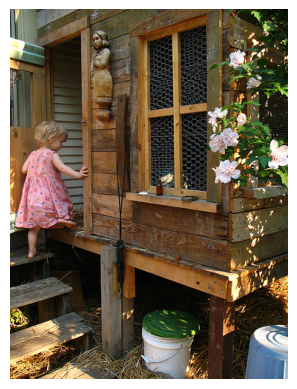

Image saved to: C:\Users\Ameyaveer Singh\unzipped_img\1000268201_693b08cb0e.jpg
Total number of files saved: 8091


In [3]:
import os
from zipfile import ZipFile
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Directory to save the unzipped images
output_dir = './unzipped_img'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Extract the first image from the zip file
with ZipFile(img_path, 'r') as zip:
    # Assuming the first image is stored in the root directory of the zip file
    first_image_name = zip.namelist()[0]
    with zip.open(first_image_name) as img_file:
        img_data = img_file.read()

# Convert the image data into a numpy array
nparr = np.frombuffer(img_data, np.uint8)
img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

# Save the image to the output directory
output_img_path = os.path.join(output_dir, os.path.basename(first_image_name))
cv2.imwrite(output_img_path, img)


# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis
plt.show()

print("Image saved to:", os.path.abspath(output_img_path))

# Extract all files from the zip file
with ZipFile(img_path, 'r') as zip:
    zip.extractall(output_dir)

# List all files in the output directory
file_names = os.listdir(output_dir)

# Count the number of saved files
num_saved_files = len(file_names)

print("Total number of files saved:", num_saved_files)


## VGG - 16 Model

In [4]:
#Load VGG
vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg')


print(vgg_model.summary()) 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## Feature Extraction

In [5]:
import os

# Extract features from all the given images
num_images_processed = 0  # Counter to track the number of images processed
final_features = {}
for i, path in enumerate(listdir, 1):
    image_path = os.path.join(output_dir, path)
    if os.path.exists(image_path):
        img_ori = cv2.imread(image_path)
        if img_ori is not None:
            img = cv2.resize(img_ori, (224, 224))
            x = np.expand_dims(img, axis=0)
            x = preprocess_input(x)

            # Use the VGG model for feature generation
            features = vgg_model.predict(x)
            final_features[path] = features.flatten()

            num_images_processed += 1  # Increment the counter

            print(f"{num_images_processed}/{i} images processed")  # Print progress

        else:
            print(f"Failed to read image: {image_path}")
    else:
        print(f"Image not found: {image_path}")

print("Total number of images processed:", len(final_features))
print("Shape of one feature vector:", final_features[listdir[0]].shape)


1/1 [==============================] - 1s 814ms/step
1/1 images processed
1/1 [==============================] - 0s 228ms/step
2/2 images processed
1/1 [==============================] - 0s 229ms/step
3/3 images processed
1/1 [==============================] - 0s 207ms/step
4/4 images processed
1/1 [==============================] - 0s 215ms/step
5/5 images processed
1/1 [==============================] - 0s 236ms/step
6/6 images processed
1/1 [==============================] - 0s 223ms/step
7/7 images processed
1/1 [==============================] - 0s 234ms/step
8/8 images processed
1/1 [==============================] - 0s 240ms/step
9/9 images processed
1/1 [==============================] - 0s 273ms/step
10/10 images processed
1/1 [==============================] - 0s 220ms/step
11/11 images processed
1/1 [==============================] - 0s 231ms/step
12/12 images processed
1/1 [==============================] - 0s 232ms/step
13/13 images processed
1/1 [=========================

Saving Features in Pickle File

In [6]:
'''
import pickle
output_pickle_path = 'featuresvgg.pkl'
with open(output_pickle_path, 'wb') as f:
    pickle.dump(final_features, f)

In [5]:
import pickle
input_pickle_path = "C:/Users/Ameyaveer Singh/Downloads/featuresvgg.pkl"
with open(input_pickle_path, 'rb') as f:
    loaded_features = pickle.load(f)

In [6]:
print("Number of features:", len(loaded_features))

Number of features: 8091


In [7]:
print("Total number of images processed:", len(loaded_features))
print("Shape of one feature vector:", loaded_features[listdir[0]].shape)

Total number of images processed: 8091
Shape of one feature vector: (512,)


## Pickle File Extraction

In [8]:
# Read the pickle file which contains all the captions for the given image

object = pd.read_pickle("C:/Users/Ameyaveer Singh/Downloads/setpklfile.pkl") 

# Print first five values

print(object[0:5])

print("Total Count of Captions are : " + str(len(object)))

['318667317_108c402140.jpg#4\tA man in a black hoodie be hold a paper sign .', '2072574835_febf0c5fb9.jpg#4\tThree race dog be run out of the start gate on a track .', '3083016677_5782bc337c.jpg#4\tTwo motorcycle with two rider each .', '95734038_2ab5783da7.jpg#0\tA man on a bike nest to a river .', '241346146_f27759296d.jpg#1\tA football player try tackle another player who have the ball .']
Total Count of Captions are : 25000


Appedning image features and captions

In [9]:
fileCaption = []
fileFeature = []

for i in range(len(object)):
    # This loop is for Caption File
    # Extract file name and caption from caption files
    file_name = object[i].split("\t")[0][:-2]
    file_text = object[i].split("\t")[1]

    # Check if file_name exists in final_features
    if file_name in loaded_features:
        # Append caption and feature
        fileCaption.append(file_text)
        fileFeature.append(loaded_features[file_name])  # Assuming final_features is a dictionary with file_name as key and feature as value

# Convert list to array
fileFeature = np.array(fileFeature)

print(fileCaption[0:5])
# Shape of the VGG feature array
print(fileFeature.shape)
# Size of the caption text list
len(fileCaption)


['A man in a black hoodie be hold a paper sign .', 'Three race dog be run out of the start gate on a track .', 'Two motorcycle with two rider each .', 'A man on a bike nest to a river .', 'A football player try tackle another player who have the ball .']
(24996, 512)


24996

Caption Pre-Processing

In [10]:
import re
# Add starting and ending tags and preprocess captions
temp_lt = []
for caption in fileCaption:
    # Convert to lowercase
    caption = caption.lower()
    # Remove special characters and numbers
    caption = re.sub(r'[^a-zA-Z\s]', '', caption)
    # Remove single characters first to avoid double spaces after removing them
    caption = re.sub(r'\s+[a-zA-Z]\s+', ' ', caption)
    # Remove extra spaces
    caption = re.sub(r'\s+', ' ', caption).strip()
    # Add starting and ending tags
    caption = '<start> ' + caption + ' <end>'
    temp_lt.append(caption)

fileCaption = temp_lt.copy()

print(fileCaption[0:5])


['<start> a man in black hoodie be hold paper sign <end>', '<start> three race dog be run out of the start gate on track <end>', '<start> two motorcycle with two rider each <end>', '<start> a man on bike nest to river <end>', '<start> a football player try tackle another player who have the ball <end>']


Tokenizing and pading captions

In [11]:
#Tokenize all the sentences
def tokenize(sentences):
    """
    This function will also save the tokeniser to convert ID's back to the text.
    """
    # Create tokenizer
    text_tokenizer = Tokenizer()
    # Fit texts
    text_tokenizer.fit_on_texts(sentences)
    return text_tokenizer.texts_to_sequences(sentences), text_tokenizer

text_tokenized, text_tokenizer = tokenize(fileCaption)

print(text_tokenized[0:5])

total_vocab = len(text_tokenizer.word_index) + 1
max_sentence_len = int(len(max(text_tokenized, key=len)))

print('Maximum length of sentence is : {}'.format(len(max(text_tokenized, key=len))))
print("Total vocabulary is of {} unique words".format(total_vocab))

#Pad all the tokenized sentences with "0" to make all the sentences of the same Length
pad_sentence = pad_sequences(text_tokenized, max_sentence_len, padding = "post")
pad_sentence[0:5]

# Reshape padded sentences (The input for LSTMs must be three dimensional.)
#pad_sentence = pad_sentence.reshape(*pad_sentence.shape, 1)
pad_sentence = pad_sentence.reshape(-1, max_sentence_len, 1)

print("Shape of the padded sentences is : " + str(pad_sentence.shape))

print(pad_sentence[0])


[[2, 3, 10, 4, 19, 792, 5, 39, 427, 187, 1], [2, 50, 102, 8, 5, 21, 89, 12, 7, 2, 793, 6, 175, 1], [2, 13, 191, 11, 13, 261, 141, 1], [2, 3, 10, 6, 71, 3194, 24, 228, 1], [2, 3, 122, 63, 183, 449, 73, 63, 236, 92, 7, 41, 1]]
Maximum length of sentence is : 32
Total vocabulary is of 5497 unique words
Shape of the padded sentences is : (24996, 32, 1)
[[  2]
 [  3]
 [ 10]
 [  4]
 [ 19]
 [792]
 [  5]
 [ 39]
 [427]
 [187]
 [  1]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]


Test-Train Split

In [12]:
from sklearn.model_selection import train_test_split
#Split Train and Test data
X_train, X_test, y_train, y_test = train_test_split(fileFeature, pad_sentence, test_size=0.2, random_state=42)
print("Training VGG Feature Shape is      : " + str(X_train.shape))
print("Testing VGG Feature Shape is       : " + str(X_test.shape))
print("Training Encoded Caption Shape is  : " + str(y_train.shape))
print("Testing Encoded Caption Shape is   : " + str(y_test.shape))

Training VGG Feature Shape is      : (19996, 512)
Testing VGG Feature Shape is       : (5000, 512)
Training Encoded Caption Shape is  : (19996, 32, 1)
Testing Encoded Caption Shape is   : (5000, 32, 1)


In [13]:
# Now we need to convert input data to tensors so that tensorflow can consume this.
def convert_to_tensors(x, y, batch_size):
    data_tensor = tf.data.Dataset.from_tensor_slices((x, y))
    data_tensor = data_tensor.cache()
    data_tensor = data_tensor.shuffle(1000, reshuffle_each_iteration = True)
    data_tensor = data_tensor.batch(batch_size, drop_remainder = True)
    return data_tensor

batch_size = 128
train = convert_to_tensors(X_train, y_train, batch_size)
test = convert_to_tensors(X_test, y_test, batch_size)

## Bi-LSTM Model

In [14]:
'''
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, RepeatVector, Reshape
from keras.models import Model
import tensorflow as tf

# Define input shapes
input_sequence = Input(shape = (512,))

r_vec = RepeatVector(max_sentence_len)(input_sequence)

# LSTM layers
decoder1 = LSTM(512, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(), dropout=0.2)(r_vec)
decoder2 = LSTM(256, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2())(decoder1)
decoder3 = LSTM(128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2())(decoder2)

# TimeDistributed layer
logits_ = TimeDistributed(Dense(total_vocab))(decoder3)

# Compile the model
lr_rate = 1e-3
model_ = Model(input_sequence, Activation('softmax')(logits_))
model_.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr_rate),
              metrics=['accuracy'])
model_.summary()
'''

from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, RepeatVector, Reshape, Bidirectional, BatchNormalization
from keras.models import Model
import tensorflow as tf

# Define input shapes
input_sequence = Input(shape=(512,))
r_vec = RepeatVector(max_sentence_len)(input_sequence)

# LSTM layers with Bidirectional and Dropout
decoder1 = Bidirectional(LSTM(256, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01), dropout=0.3))(r_vec)
decoder2 = Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01), dropout=0.2))(decoder1)
decoder3 = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01), dropout=0.1))(decoder2)

# Batch Normalization
batch_norm = BatchNormalization()(decoder3)

# TimeDistributed layer
logits = TimeDistributed(Dense(total_vocab))(batch_norm)

# Activation layer
activation = Activation('softmax')(logits)

# Compile the model
lr_rate = 1e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=lr_rate,
    decay_steps=10000,
    decay_rate=0.9)

model = Model(input_sequence, activation)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512)]             0         
                                                                 
 repeat_vector (RepeatVector  (None, 32, 512)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 32, 512)          1574912   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32, 256)          656384    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32, 128)          164352    
 nal)                                                        

Model Training

In [20]:
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Train the model
t0 = time.time()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(train,
                    validation_data=test,
                    epochs=20,  # Increased the number of epochs
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping, model_checkpoint])  # Added callbacks

t1 = time.time()

# Print training time
print("Total time taken for training:", round(t1-t0, 3), "seconds")

# Evaluate the model
loss, accuracy = model.evaluate(test, verbose=2)
print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/20
156/156 [==============================] - ETA: 0s - loss: 2.2107 - accuracy: 0.6908
Epoch 1: val_loss improved from inf to 2.21727, saving model to best_model.h5
156/156 [==============================] - 199s 1s/step - loss: 2.2107 - accuracy: 0.6908 - val_loss: 2.2173 - val_accuracy: 0.6945
Epoch 2/20
156/156 [==============================] - ETA: 0s - loss: 2.1348 - accuracy: 0.6925
Epoch 2: val_loss improved from 2.21727 to 2.14166, saving model to best_model.h5
156/156 [==============================] - 192s 1s/step - loss: 2.1348 - accuracy: 0.6925 - val_loss: 2.1417 - val_accuracy: 0.6909
Epoch 3/20
156/156 [==============================] - ETA: 0s - loss: 2.0755 - accuracy: 0.6945
Epoch 3: val_loss improved from 2.14166 to 2.08761, saving model to best_model.h5
156/156 [==============================] - 199s 1s/step - loss: 2.0755 - accuracy: 0.6945 - val_loss: 2.0876 - val_accuracy: 0.6927
Epoch 4/20
156/156 [==============================] - ETA: 0s - loss: 2.02

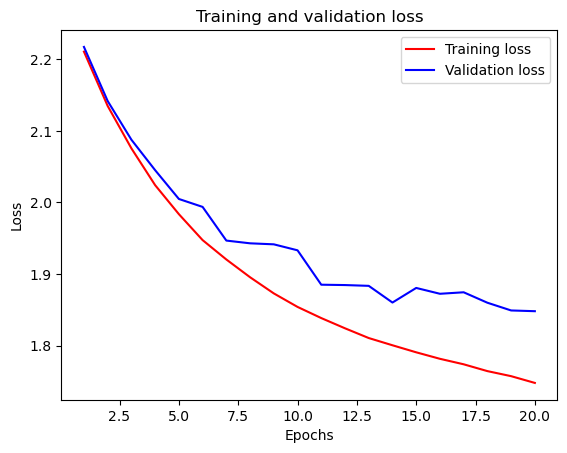

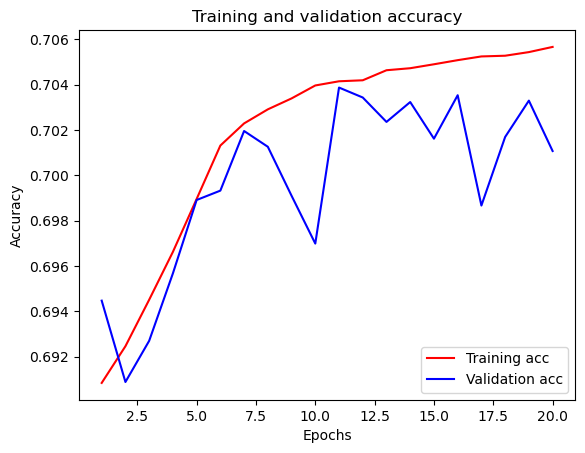

In [21]:
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
loss = history_dict['loss']
val_acc  = history_dict['val_accuracy']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

## Caption Prediction

In [ ]:
# List of image paths
image_paths = [
    "C:/Users/Ameyaveer Singh/Downloads/man_eating.jpg",
    "C:/Users/Ameyaveer Singh/OneDrive/Desktop/input images/baby_playing.jpg",
    "C:/Users/Ameyaveer Singh/OneDrive/Desktop/input images/drinking-water.jpg",
    "C:/Users/Ameyaveer Singh/OneDrive/Desktop/input images/driving.jpg",
    "C:/Users/Ameyaveer Singh/OneDrive/Desktop/input images/Running.jpg"
]

def logits_to_sentence(logits, tokenizer):
    index_to_words = {idx: word for word, idx in tokenizer.word_index.items()}
    index_to_words[0] = '<empty>'
    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

# Process each image and predict the caption
for image_path in image_paths:
    # Load input image
    img_ori = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img_ori is None:
        print(f"Error: Could not read image from '{image_path}'")
        continue

    # Resize the image
    img = cv2.resize(img_ori, (299, 299))  # Size for Inception V3

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Input Image")
    plt.show()

    # Convert image to array and preprocess
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Pass preprocessed image to the model for feature extraction
    feature = vgg_model.predict(x)
    input_feature = np.array(feature[0]).reshape((1, 512))

    # Predict the caption using the extracted features
    predicted_sentence = logits_to_sentence(model.predict(input_feature)[0], text_tokenizer)
    print('The predicted sentence for the image is:')
    print(predicted_sentence)
    print("\n")  # Add a newline for better readability between predictions

## InceptionV3 Model

In [6]:
from tensorflow.keras.applications import InceptionV3

inception_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')

print(inception_model.summary())

87910968/87910968 [==============================] - 39s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_8 (Conv2D)              (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_8 (BatchNo  (None, None, None,   96         ['conv2d_8[0][0]']               
 rmalization)        

## Feature Extraction

In [7]:
import os

# Extract features from all the given images
num_images_processed = 0  # Counter to track the number of images processed
final_features_1 = {}
for i, path in enumerate(listdir, 1):
    image_path = os.path.join(output_dir, path)
    if os.path.exists(image_path):
        img_ori = cv2.imread(image_path)
        if img_ori is not None:
            img = cv2.resize(img_ori, (224, 224))
            x = np.expand_dims(img, axis=0)
            x = preprocess_input(x)

            # Use the VGG model for feature generation
            features_1 = inception_model.predict(x)
            final_features_1[path] = features_1.flatten()

            num_images_processed += 1  # Increment the counter

            print(f"{num_images_processed}/{i} images processed")  # Print progress

        else:
            print(f"Failed to read image: {image_path}")
    else:
        print(f"Image not found: {image_path}")

print("Total number of images processed:", len(final_features_1))
print("Shape of one feature vector:", final_features_1[listdir[0]].shape)


1/1 [==============================] - 2s 2s/step
1/1 images processed
1/1 [==============================] - 0s 57ms/step
2/2 images processed
1/1 [==============================] - 0s 68ms/step
3/3 images processed
1/1 [==============================] - 0s 57ms/step
4/4 images processed
1/1 [==============================] - 0s 57ms/step
5/5 images processed
1/1 [==============================] - 0s 58ms/step
6/6 images processed
1/1 [==============================] - 0s 59ms/step
7/7 images processed
1/1 [==============================] - 0s 58ms/step
8/8 images processed
1/1 [==============================] - 0s 66ms/step
9/9 images processed
1/1 [==============================] - 0s 65ms/step
10/10 images processed
1/1 [==============================] - 0s 58ms/step
11/11 images processed
1/1 [==============================] - 0s 66ms/step
12/12 images processed
1/1 [==============================] - 0s 65ms/step
13/13 images processed
1/1 [==============================] - 0s 69m

In [12]:
import pickle
output_pickle_path_ = 'features_Xcep.pkl'
with open(output_pickle_path_, 'wb') as f:
    pickle.dump(final_features_1, f)

In [13]:
import pickle
input_pickle_path_ = "C:/Users/Ameyaveer Singh/Downloads/features_Xcep.pkl"
with open(input_pickle_path_, 'rb') as f:
    features_Xcep = pickle.load(f)

In [14]:
print("Number of features:", len(features_Xcep))

Number of features: 8091


In [17]:
fileCaption = []
fileFeature_ = []

for i in range(len(object)):
    # This loop is for Caption File
    # Extract file name and caption from caption files
    file_name = object[i].split("\t")[0][:-2]
    file_text = object[i].split("\t")[1]

    # Check if file_name exists in final_features
    if file_name in features_Xcep:
        # Append caption and feature
        fileCaption.append(file_text)
        fileFeature_.append(features_Xcep[file_name])  # Assuming final_features is a dictionary with file_name as key and feature as value

# Convert list to array
fileFeature_ = np.array(fileFeature_)

print(fileCaption[0:5])
# Shape of the Xception feature array
print(fileFeature_.shape)
# Size of the caption text list
len(fileCaption)


['A man in a black hoodie be hold a paper sign .', 'Three race dog be run out of the start gate on a track .', 'Two motorcycle with two rider each .', 'A man on a bike nest to a river .', 'A football player try tackle another player who have the ball .']
(24996, 2048)


24996

In [18]:
import re
# Add starting and ending tags and preprocess captions
temp_lt = []
for caption in fileCaption:
    # Convert to lowercase
    caption = caption.lower()
    # Remove special characters and numbers
    caption = re.sub(r'[^a-zA-Z\s]', '', caption)
    # Remove single characters first to avoid double spaces after removing them
    caption = re.sub(r'\s+[a-zA-Z]\s+', ' ', caption)
    # Remove extra spaces
    caption = re.sub(r'\s+', ' ', caption).strip()
    # Add starting and ending tags
    caption = '<start> ' + caption + ' <end>'
    temp_lt.append(caption)

fileCaption = temp_lt.copy()

print(fileCaption[0:5])

['<start> a man in black hoodie be hold paper sign <end>', '<start> three race dog be run out of the start gate on track <end>', '<start> two motorcycle with two rider each <end>', '<start> a man on bike nest to river <end>', '<start> a football player try tackle another player who have the ball <end>']


In [19]:
#Tokenize all the sentences
def tokenize(sentences):
    """
    This function will also save the tokeniser to convert ID's back to the text.
    """
    # Create tokenizer
    text_tokenizer = Tokenizer()
    # Fit texts
    text_tokenizer.fit_on_texts(sentences)
    return text_tokenizer.texts_to_sequences(sentences), text_tokenizer

text_tokenized, text_tokenizer = tokenize(fileCaption)

print(text_tokenized[0:5])

total_vocab = len(text_tokenizer.word_index) + 1
max_sentence_len = int(len(max(text_tokenized, key=len)))

print('Maximum length of sentence is : {}'.format(len(max(text_tokenized, key=len))))
print("Total vocabulary is of {} unique words".format(total_vocab))

#Pad all the tokenized sentences with "0" to make all the sentences of the same Length
pad_sentence = pad_sequences(text_tokenized, max_sentence_len, padding = "post")
pad_sentence[0:5]

# Reshape padded sentences (The input for LSTMs must be three dimensional.)
#pad_sentence = pad_sentence.reshape(*pad_sentence.shape, 1)
pad_sentence = pad_sentence.reshape(-1, max_sentence_len, 1)

print("Shape of the padded sentences is : " + str(pad_sentence.shape))

print(pad_sentence[0])


[[2, 3, 10, 4, 19, 792, 5, 39, 427, 187, 1], [2, 50, 102, 8, 5, 21, 89, 12, 7, 2, 793, 6, 175, 1], [2, 13, 191, 11, 13, 261, 141, 1], [2, 3, 10, 6, 71, 3194, 24, 228, 1], [2, 3, 122, 63, 183, 449, 73, 63, 236, 92, 7, 41, 1]]
Maximum length of sentence is : 32
Total vocabulary is of 5497 unique words
Shape of the padded sentences is : (24996, 32, 1)
[[  2]
 [  3]
 [ 10]
 [  4]
 [ 19]
 [792]
 [  5]
 [ 39]
 [427]
 [187]
 [  1]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]


In [20]:
from sklearn.model_selection import train_test_split
#Split Train and Test data
X_train_, X_test_, y_train, y_test = train_test_split(fileFeature_, pad_sentence, test_size=0.2, random_state=42)
print("Training InceptionV3 Feature Shape is      : " + str(X_train_.shape))
print("Testing InceptionV3 Feature Shape is       : " + str(X_test_.shape))
print("Training Encoded Caption Shape is  : " + str(y_train.shape))
print("Testing Encoded Caption Shape is   : " + str(y_test.shape))

Training InceptionV3 Feature Shape is      : (19996, 2048)
Testing InceptionV3 Feature Shape is       : (5000, 2048)
Training Encoded Caption Shape is  : (19996, 32, 1)
Testing Encoded Caption Shape is   : (5000, 32, 1)


In [21]:
# Now we need to convert input data to tensors so that tensorflow can consume this.
def convert_to_tensors(x, y, batch_size):
    data_tensor = tf.data.Dataset.from_tensor_slices((x, y))
    data_tensor = data_tensor.cache()
    data_tensor = data_tensor.shuffle(1000, reshuffle_each_iteration = True)
    data_tensor = data_tensor.batch(batch_size, drop_remainder = True)
    return data_tensor

batch_size = 128
train_ = convert_to_tensors(X_train_, y_train, batch_size)
test_ = convert_to_tensors(X_test_, y_test, batch_size)

## LSTM Model

In [25]:
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, RepeatVector, Reshape
from keras.models import Model
import tensorflow as tf

# Define input shapes
input_sequence = Input(shape = (2048,))

r_vec = RepeatVector(max_sentence_len)(input_sequence)

# LSTM layers
decoder1 = LSTM(256, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(), dropout=0.2)(r_vec)
decoder2 = LSTM(128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2())(decoder1)
decoder3 = LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2())(decoder2)

# TimeDistributed layer
logits = TimeDistributed(Dense(total_vocab))(decoder3)

# Compile the model
lr_rate = 1e-3
model = Model(input_sequence, Activation('softmax')(logits))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr_rate),
              metrics=['accuracy'])
model.summary()




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2048)]            0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 32, 2048)         0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 32, 256)           2360320   
                                                                 
 lstm_4 (LSTM)               (None, 32, 128)           197120    
                                                                 
 lstm_5 (LSTM)               (None, 32, 64)            49408     
                                                                 
 time_distributed_1 (TimeDis  (None, 32, 5497)         357305    
 tributed)                                                 

In [26]:
# Train the model
t0 = time.time()
history = model.fit(train_,
                    validation_data=test_,
                    epochs=10,
                    shuffle=True,
                    verbose=1)
t1 = time.time()

# Print training time
print("Total time taken for training:", round(t1-t0, 3), "seconds")

# Evaluate the model
loss, accuracy = model.evaluate(test_, verbose=2)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/10
156/156 [==============================] - 1191s 8s/step - loss: 5.9414 - accuracy: 0.6306 - val_loss: 2.4602 - val_accuracy: 0.6666
Epoch 2/10
156/156 [==============================] - 1924s 12s/step - loss: 2.2659 - accuracy: 0.6650 - val_loss: 2.0844 - val_accuracy: 0.6667
Epoch 3/10
156/156 [==============================] - 1337s 9s/step - loss: 2.0206 - accuracy: 0.6865 - val_loss: 1.9395 - val_accuracy: 0.6952
Epoch 4/10
156/156 [==============================] - 1260s 8s/step - loss: 1.9287 - accuracy: 0.6957 - val_loss: 1.8896 - val_accuracy: 0.7003
Epoch 5/10
156/156 [==============================] - 1239s 8s/step - loss: 1.8867 - accuracy: 0.6976 - val_loss: 1.8517 - val_accuracy: 0.7002
Epoch 6/10
156/156 [==============================] - 1254s 8s/step - loss: 1.8604 - accuracy: 0.6977 - val_loss: 1.8362 - val_accuracy: 0.7005
Epoch 7/10
156/156 [==============================] - 1242s 8s/step - loss: 1.8454 - accuracy: 0.6977 - val_loss: 1.8227 - val_accuracy

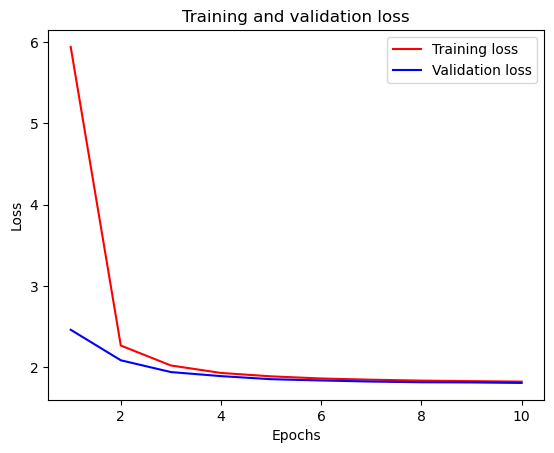

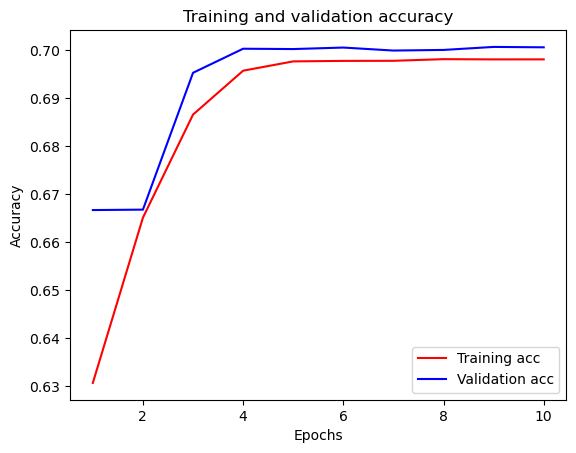

In [27]:
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
loss = history_dict['loss']
val_acc  = history_dict['val_accuracy']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()